<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Hypothesis Testing and The Null Hypothesis

Hypothesis testing is a statistical method used to make decisions or inferences about a population based on sample data.
You test an assumption (hypothesis) by analyzing the data and deciding whether to reject or fail to reject that assumption.

**Null Hypothesis (H₀):**
* States that nothing has changed, or there is no effect, no difference, or no association.
* It is the default or starting assumption.
* Example: “The new drug has no effect compared to the old one.”

**Alternative Hypothesis (H₁ or Ha):**
* States that there is an effect, a difference, or a relationship.
* What you hope to prove



In [ ]:
# prompt: generate two sample data, size=50 range from 10 to 100, call them control and treatment

import numpy as np

control = np.random.randint(10, 101, size=50)
treatment = np.random.randint(10, 101, size=50)

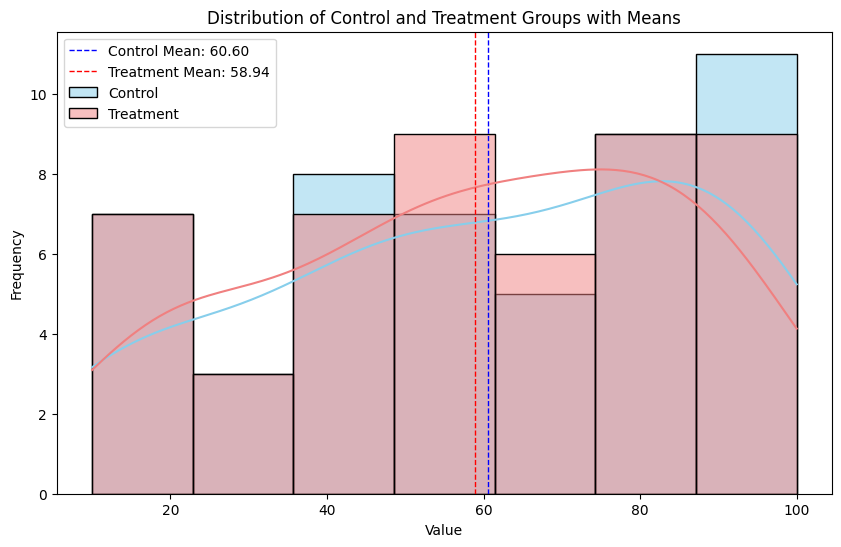

In [ ]:
# prompt: Plot the distribution of the data. Frequency vs value, and show the means

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot the distribution for the control group
sns.histplot(control, kde=True, label='Control', color='skyblue')
plt.axvline(np.mean(control), color='blue', linestyle='dashed', linewidth=1, label=f'Control Mean: {np.mean(control):.2f}')

# Plot the distribution for the treatment group
sns.histplot(treatment, kde=True, label='Treatment', color='lightcoral')
plt.axvline(np.mean(treatment), color='red', linestyle='dashed', linewidth=1, label=f'Treatment Mean: {np.mean(treatment):.2f}')

plt.title('Distribution of Control and Treatment Groups with Means')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Hypothesis Testing
A test statistic is a number calculated from sample data that tells you how far your data is from what you'd expect if the null hypothesis (H₀) were true.
It helps you decide whether to reject or fail to reject the null hypothesis.

**How Is It Used?**
* You compare the test statistic to a critical value (from a table) or use it to find the p-value.
* The larger the test statistic (in absolute value), the more evidence against H₀.
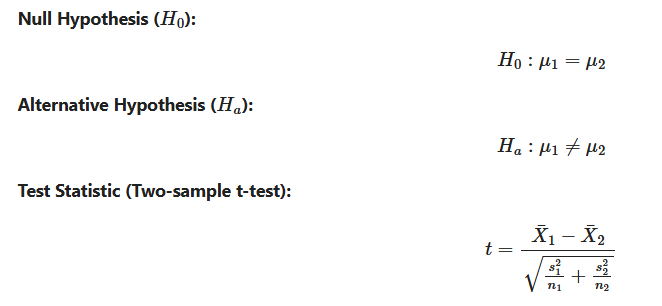



# t-Statistic (for small samples, unknown population std. dev.)
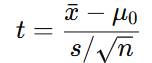
s: sample standard deviation

In [ ]:
# prompt: Calculate t-statistic only

from scipy import stats

# Calculate the t-statistic
t_statistic, p_value = stats.ttest_ind(treatment, control)

print(f"T-statistic: {t_statistic}")

T-statistic: -0.30808342109029657


$t \approx 0$ → The difference between the two group means is small, likely due to random chance.

$|t|$ becomes large → The observed difference is less likely to have occurred by chance under the null hypothesis.

The larger the absolute value of t, the stronger the evidence against $H_0$

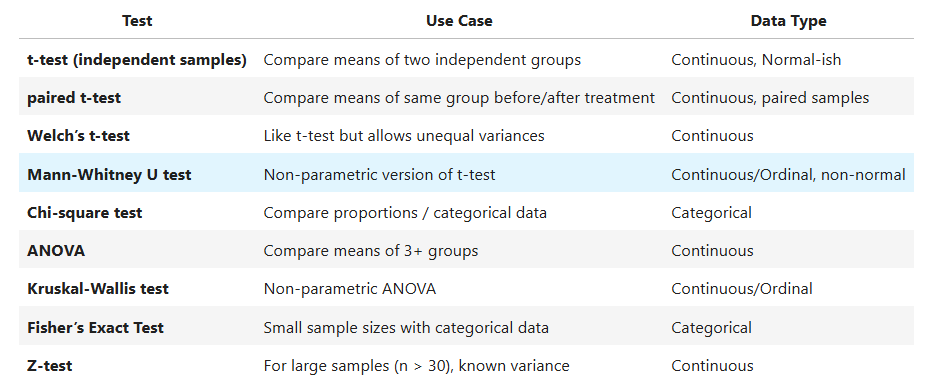


# 2. What are p-values and how to interpret them
A p-value is the probability of getting results at least as extreme as the ones you observed, assuming the null hypothesis (H₀) is true.

In other words, it answers:
“If there were really no effect, what is the chance we’d see results like this (or more extreme) just by random chance?”

The p-value measures the probability of observing data as extreme as, or more extreme than, what was actually observed — assuming the null hypothesis is true. A small p-value (typically less than 0.05) suggests that the observed data is unlikely under the null, leading us to consider rejecting it. However, it is not the probability that the null hypothesis is true — a common misconception.

**How to Interpret a p-value:**
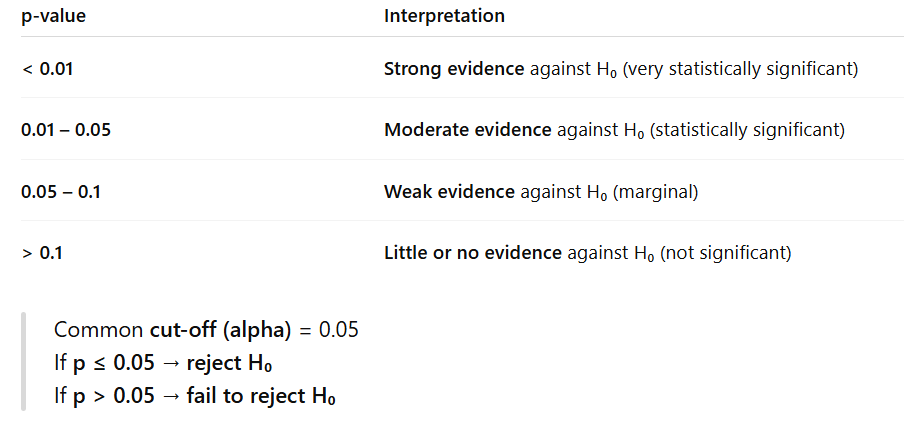


**Example:**
You test whether a new drug works better than the current one.
* Null hypothesis (H₀): No difference.
* After testing, you get a p-value = 0.03.

Interpretation:
There’s a 3% chance you’d see results this extreme if the drug really had no effect. Since 0.03 < 0.05, you reject H₀ and conclude the new drug likely works better.

**Common Misunderstandings**
* A p-value is not the probability that the null hypothesis is true.
* A p-value does not measure the size or importance of an effect.
* It only tells you how likely your data is under H₀.

**Summary:**
* p-value quantifies how surprising your data is, assuming H₀ is true.
* Small p-value (≤ 0.05) → evidence against H₀.
* Large p-value (> 0.05) → not enough evidence to reject H₀.


T-statistic: -1.3407
P-value: 0.1852
Since the p-value (0.1852) is greater than or equal to the significance level (0.05), we fail to reject the null hypothesis.
There is not enough evidence to conclude that the means of the two samples are significantly different.


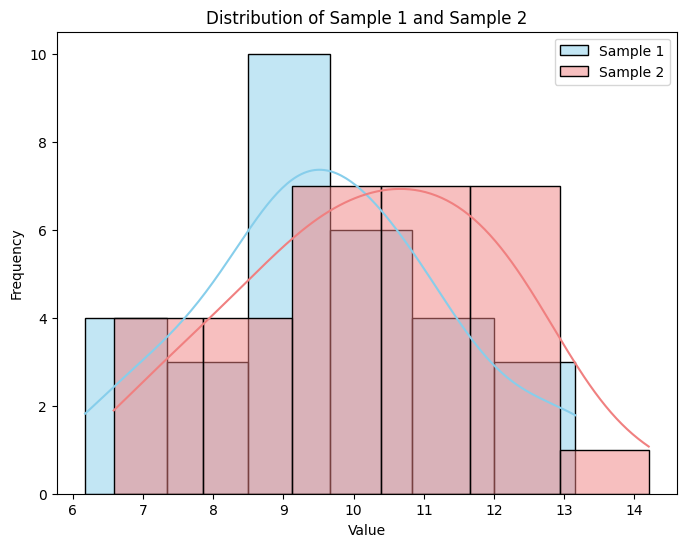

In [ ]:
# prompt: Give me example for p-value

import matplotlib.pyplot as plt
import numpy as np
# Performing a t-test to compare two sample means
# Let's generate two sample datasets
np.random.seed(42) # for reproducibility
sample1 = np.random.normal(loc=10, scale=2, size=30) # Mean = 10, Std Dev = 2, N = 30
sample2 = np.random.normal(loc=10.5, scale=2, size=30) # Mean = 10.5, Std Dev = 2, N = 30

# We want to test if there is a significant difference between the means of these two samples.
# Null Hypothesis (H₀): The means of the two samples are equal (μ₁ = μ₂).
# Alternative Hypothesis (H₁): The means of the two samples are not equal (μ₁ ≠ μ₂).

# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05 # Significance level

if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is sufficient evidence to conclude that the means of the two samples are significantly different.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the means of the two samples are significantly different.")

# Visualizing the data (optional)
plt.figure(figsize=(8, 6))
sns.histplot(sample1, kde=True, color='skyblue', label='Sample 1')
sns.histplot(sample2, kde=True, color='lightcoral', label='Sample 2')
plt.title('Distribution of Sample 1 and Sample 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. How to Calculate a p-value

**Step 1: State Your Hypotheses:**
* Null hypothesis (H₀): Assumes no effect or difference.
* Alternative hypothesis (H₁): Assumes there is an effect or difference.

Example:
- H₀: μ = 100
- H₁: μ ≠ 100

**Step 2: Choose and Compute the Test Statistic:**
Choose the appropriate test based on your data:

* z-test (large sample, known population std. dev):
$z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n} }$

* t-test (small sample, unknown population std. dev):
$t = \frac{\bar{x}-\mu_0}{s/\sqrt{n} }$

**Step 3: Find the p-value:**
Once you have your test statistic (z or t):

* Use a z-table or t-table, OR
* Use a calculator, Excel, or software like Python/R to get the p-value

**Example: One-sample t-test:**
You collect a sample:

* $\bar{x} =52$
* $\mu_0 = 50$
* $s=4$
* $n=16$

$t = \frac{52-50}{1}= 2$

Degrees of freedom = $n-1=15$

Now check a t-table or use a calculator for t = 2, df = 15
--> Two-tailed p-value ≈ 0.06

**Step 4: Interpret the p-value**
* If p ≤ 0.05, reject H₀ → result is statistically significant
* If p > 0.05, fail to reject H₀ → not enough evidence

**Exercise:**
Use propmt query to get answers


# 4. p-hacking
P-hacking (also known as data dredging or data fishing) is the practice of manipulating data or analysis until you get a statistically significant p-value (typically p < 0.05), even if the result is not truly meaningful or real.

p-hacking refers to manipulating data or analyses until statistically significant results are found — often by running multiple tests and only reporting the "successful" ones. This inflates the risk of false positives. In this simulation, we show how running multiple comparisons can lead to a significant result purely by chance, even when no real effect exists.

**Examples of p-hacking:**
* Running multiple tests and only reporting the ones with p < 0.05.
* Stopping data collection early once significance is reached.
* Removing "outliers" selectively to reach significance.
* Trying different statistical tests or models until one gives a low p-value
* Subgroup analysis not pre-specified, just to find something significant

**Example:**
Let’s say a researcher tests 20 variables but only reports the 1 or 2 that show p < 0.05.
* On average, 1 in 20 tests will yield p < 0.05 by pure chance.
* If those results are published without correcting for multiple comparisons, it gives false confidence in those findings.

**How to Avoid P-hacking:**
* Pre-register your study design (e.g., on ClinicalTrials.gov)
* Predefine hypotheses and analysis plans
* Correct for multiple comparisons (e.g., Bonferroni correction)
* Report all tests, not just significant ones
* Focus on effect size and confidence intervals, not just p-values

| Feature       | Meaning                                            |
| ------------- | -------------------------------------------------- |
| **p-hacking** | Manipulating analysis to get a significant p-value |
| **Risk**      | False positives, misleading conclusions            |
| **Solution**  | Transparency, preregistration, correction methods  |

**Prompt:**
> simulate p-hacking

# 5. False Discovery Rates (FDR)
The False Discovery Rate (FDR) is the expected proportion of false positives among all the results that are declared statistically significant.

In simpler terms: FDR tells you how many of your "positive findings" are probably wrong.

When performing many hypothesis tests, some will be statistically significant just by chance. The False Discovery Rate (FDR) is the expected proportion of false positives among the results deemed significant. The Benjamini-Hochberg procedure controls the FDR and is commonly used in genomics, psychology and other fields where many tests run simultaneously.

**Why It Matters:**
When you run many hypothesis tests (e.g., in genomics, psychology, or data mining), even if all null hypotheses are true, some tests will give p < 0.05 by chance. So, if you get 100 significant results at p < 0.05, some may be false positives — FDR helps quantify and control this.

**How to Control FDR:**
The most common method: Benjamini-Hochberg Procedure
1. Run multiple tests and get all p-values.
2. Rank the p-values from smallest to largest.
3. Calculate a critical value for each:
  * BH critical value = $\frac{i}{m} * Q$,
   where:
    * i = rank
    * m = total number of tests
    * Q = desired FDR level (e.g., 0.05)
4. Find the largest p-value where:
  $p_i <= $ BH critical value
5. Declare all p-values up to that point as significant

**Example:**
Say you test 10 genes and get p-values:

0.001, 0.007, 0.02, 0.04, 0.05, 0.08, 0.12, 0.20, 0.32, 0.50

Set desired FDR: Q = 0.05

Then for each $i$ (rank), calculate:
threshold = $\frac{i}{10} * 0.05$

Compare p-values to thresholds. Suppose p-values 1–3 are under their thresholds → those are declared significant, controlling the false discovery rate at 5%.

**prompt:** Apply FDR correction using Benjamini-Hochberg

# 6. Statistical Power
Statistical power is the probability that a statistical test will correctly reject a false null hypothesis.

Power = probability of detecting a real effect when it exists.

Statistical power is the probability that a test correctly rejects a false null hypothesis (i.e., detects a true effect). It depends on factors such as effect size, sample size, and significance level. A low-power study is likely to miss real effects, while high power increases the chances of detecting true differences when they exist.

**Why Is It Important?**
* High power means you're more likely to find true effects.
* Low power means you risk missing real effects (Type II error).

**Formula (Conceptually):**
Power = $1 - \beta$
, $\beta=$probability of a Type II error (failing to reject a false null hypothesis).

**Factors That Affect Power:**

| Factor                               | Effect on Power                           |
| ------------------------------------ | ----------------------------------------- |
| **Sample size (n)**                  | ↑ Larger sample = ↑ Power                 |
| **Effect size**                      | ↑ Bigger effect = ↑ Power                 |
| **Significance level (α)**           | ↑ Higher α (e.g., 0.05 to 0.10) = ↑ Power |
| **Variability (standard deviation)** | ↑ Less variability = ↑ Power              |

**Common Power Target:**
* 80% power is the typical minimum in research
  * This means you have an 80% chance of detecting a true effect if it exists.

**Example Scenario:**
You're testing if a new drug improves recovery time.
* Null Hypothesis (H₀): No difference
* You want 80% power to detect a 5-day improvement
* You use power analysis (software or formulas) to find you need 100 patients per group.

**Summary:**

| Term               | Meaning                                            |
| ------------------ | -------------------------------------------------- |
| **Power**          | Chance of finding a true effect (true positive)    |
| **Ideal value**    | ≥ 0.80 (or 80%)                                    |
| **Depends on**     | Sample size, effect size, variability, alpha level |
| **Low power risk** | Missing real effects (Type II error)               |




# 7. Power Analysis
Power analysis is a statistical method used to:
Determine how many observations (sample size) you need to detect an effect of a certain size with a desired level of confidence.
Before conducting an experiment, it's often useful to determine how large your sample needs to be to reliably detect an effect. This is the goal of power analysis — it helps researchers plan studies with adequate sensitivity to identify meaningful results, reducing the risk of wasted effort or misleading conclusions.

It can also be used to:
* Estimate the power of a test (given sample size and effect size)
* Calculate the minimum detectable effect
* Choose a suitable significance level ($α$)

**Goals of Power Analysis:**
You can use it to solve for:

| What you're solving for | Given                           |
| ----------------------- | ------------------------------- |
| **Sample size (n)**     | Power, effect size, alpha       |
| **Power**               | Sample size, effect size, alpha |
| **Effect size**         | Sample size, power, alpha       |
| **Alpha**               | Sample size, power, effect size |

**Key Components of Power Analysis:**

| Component           | Description                                                                |
| ------------------- | -------------------------------------------------------------------------- |
| **Power (1 - β)**   | Probability of detecting a true effect (commonly set to **0.8 or 80%**)    |
| **Effect Size**     | Magnitude of the difference or effect you want to detect (e.g., Cohen's d) |
| **Alpha (α)**       | Significance level (probability of Type I error, typically **0.05**)       |
| **Sample Size (n)** | Number of observations required                                            |

**Common Effect Size Measures:**

| Test       | Effect Size                                            |
| ---------- | ------------------------------------------------------ |
| t-test     | **Cohen's d** (0.2 = small, 0.5 = medium, 0.8 = large) |
| ANOVA      | **η²** or **f**                                        |
| Chi-square | **Cramér's V**                                         |

**Example: Sample Size Calculation**
You want to detect a medium effect (d = 0.5) using a two-sample t-test with:
* Power = 0.8
* $α$ = 0.05

Using software or a power calculator: Required sample size per group ≈ 64

**Prompt:** calculate power analysis with power=80 and alpha=0.05

# The Central Limit Theorem (CLT)
The Central Limit Theorem is a fundamental concept in statistics that states: If you take a large number of random samples from any population (with a finite mean and variance), the distribution of the sample means will approach a normal distribution — regardless of the original population’s distribution.

The Central Limit Theorem (CLT) states that, regardless of the population's distribution, the distribution of sample means will approach a normal distribution as the sample size increases. This is a cornerstone of inferential statistics and explains why many statistical methods assume normality — even when the underlying data is not normally distributed.

**Key Points:**
* The sample means will be approximately normally distributed
* This applies no matter the shape of the population distribution (e.g., skewed, uniform, etc.)
* The approximation improves as sample size increases
* The mean of the sample means = population mean ($μ$)
* The standard deviation of the sample means = standard error: SE=$\frac{\sigma}{\sqrt(n)}$

**Visual Example:**
* Population: Not normal (e.g., skewed)
* Take many samples (e.g., n = 30 in each)
* Compute the mean of each sample
* Plot the distribution of these means → it becomes bell-shaped (normal) as n increases

**Why Is CLT Important?**
* It allows us to use normal-based methods (like z-tests, confidence intervals) even when the population isn't normal.
* It underlies many statistical procedures and justifies using the normal distribution when dealing with averages from samples.

**Rule of Thumb:**
* CLT works well if sample size $n \ge 30$
* For very non-normal populations, larger n (like 50–100) may be needed

**Example:**
You measure weights of apples (not normally distributed).
You take many samples of size 40 and compute their means.
* The distribution of individual weights is not normal
* But the distribution of sample means will be approximately normal
* This lets you construct confidence intervals or perform hypothesis testing using normal-based formulas

**Summary:**

| Feature            | Description                                         |
| ------------------ | --------------------------------------------------- |
| **CLT**            | Sample means → normal distribution as sample size ↑ |
| **Applies to**     | Any population with finite mean and variance        |
| **Used for**       | Confidence intervals, z-tests, t-tests              |
| **Standard Error** | $\sigma / \sqrt{n}$                                 |
